ValueError: (168, 168, 168) is not a valid value for color

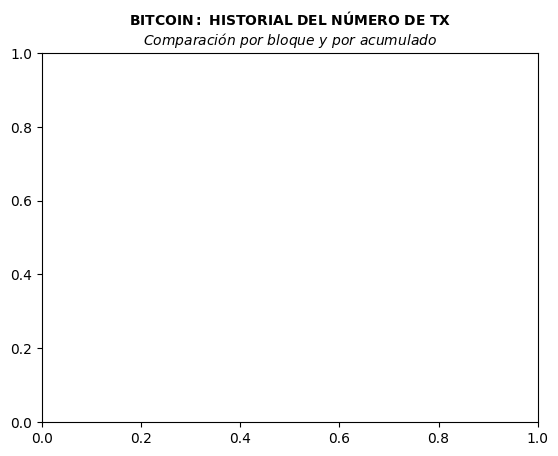

In [10]:
#librerias 


#usar comandos del sistema
import os
#manejo numerico
import numpy as np
#graficar
import matplotlib.pyplot as plt
#libreria manejo de tipografia
from matplotlib import font_manager as fm, rcParams

#cambiar la typografia
fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



# Estilos: ESTAS VARIABLES CONTIENEN ESTILOS
estilo_dark=[(168, 168, 168), (0, 0, 0), (210, 210, 210),] 
# GRIS  ,  NEGRO , PLOMO
estilo_blanco=[(0, 0, 0), (255, 255, 255), (255, 255, 255),] 
# NEGRO , BLANCO, BLANCO



Estilos=[estilo_dark,estilo_blanco]

# se tienen variables que contienen los colores del formato
# estilo[0]= Titulos y letras 
# estilo[1] = Fondo principal
# estilo[2] = Fondo imagen




# colores: ESTA VARIABLE CONTIENE COLORES
colores = [(141, 211, 199),(254, 255, 179),(31, 119, 180),] 
#amarillo, azul claro, azul fuerte,

rgba(3,7,100,1)rgba(88,172,143,1)

for i in range(len(estilo_dark)):
    r, g, b = estilo_dark[i]
    estilo_dark[i] = (r / 255., g / 255., b / 255.)

for i in range(len(estilo_blanco)):
    r, g, b = estilo_blanco[i]
    estilo_blanco[i] = (r / 255., g / 255., b / 255.)


fig, ax = plt.subplots()
########
ax = plt.gca()
#titulo
plt.title(r"$\bf{BITCOIN:\ HISTORIAL\ DEL\ NÚMERO\ DE\ TX}$" "\n" r"$\it{Comparación\ por\ bloque\ y\ por\ acumulado}$",fontsize=10,color=Estilos[0][0],fontproperties=prop)


#Color del fondo
fig.patch.set_facecolor(colores[1])

#fondo dentro la grafica
plt.axes().patch.set_facecolor(colores[2])

ax.set_yticks([],[],)
ax.set_xticks([],[],)
###cuadricula
plt.grid(False, color=colores[2],axis= 'both')


color: 
#colores de los números
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', colors='gray')
t=np.linspace(0,13,100)
#xt = np.random.randn(100)
xt=np.sin(t)
plt.plot(t,xt,label="disperso",color=colores[3])

plt.show()
#plt.savefig('test.png')

In [ ]:
rgb = (0,0,0)